In [5]:
# Downloading the Data - utilize 'urlretrieve' function from 'urllib.request'

medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x239d6ec3ed0>)

In [6]:
# Create a Pandas dataframe using the downloaded file, to view and analyze data.

import pandas as pd
medical_df = pd.read_csv('medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
# Check to DF to ensure it was installed

medical_df.info()
print(medical_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max     

In [8]:
# Exploratory Analysis and Visualization
# Install plotlty, matplotlib, and seaborn. Then import them into the the script

import plotly.express as px # High-level api
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# improvising the default style and the fonts in our charts
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [10]:
## Age
# Visulaize the distribution of age using a histogram with 47 bins (one for each year) and a box plot.
# Utilize plotly to make the chart interactive (Note: similar charts could be used with Seaborn)

medical_df.age.describe()

fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [11]:
## Body mass index
# Look at the distribution of BMI of customers, using a histogram and a box plot.

fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of Body Mass Index (BMI)')
fig.update_layout(bargap=0.1)
fig.show()

# You will see a Guassian distribution (Normal distribution)

In [12]:
## Charges
# Let's visualize the annual medical charges of customers. This is the column of where we try to predict.
# Let's use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

fig = px.histogram(medical_df,
                   x='charges',
                   color='smoker',  # This pulls another column and make it a different color.
                   color_discrete_sequence=['grey', 'green'],
                   marginal='box',
                   title="Annual Medical Charges")
fig.update_layout(bargap=.01)
fig.show()

# What you will see is that smokers on median, will have a higher annual insurance fees.
# We see an exponetial decrease in the count of amount of people who smoke. 

In [13]:
## Exercise: Visualize the distribution of medical charges in connection with the factors like "sex" and "region". What do you observe?

fig = px.histogram(medical_df,
                   x='sex',
                   color='region',
                   color_discrete_sequence=['green','blue', 'red', 'orange'],
                   title='Distribution between Sex and Region')
fig.update_layout(bargap=.1,
                  xaxis_title_font_textcase='upper',
                  yaxis_title_font_textcase='upper')
fig.show()

# We can see that there i

In [14]:
## Smoker
# Visualize the distribution of "smoker" column (containing values "yes" and "no") using a histogram

px.histogram(medical_df,
             x='smoker',
             color='sex',
             title='Smokers between sex')

# Visually, people who smoke seems to be more Men.

In [15]:
## Age and Charges
# Visualize the relationships between "age" and "charges" using a scatter plot.
# Each point in th escatter plot represents one customer.
# Use the values "smoker" column to color the points.

fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,  # Opacity level between on the points.
                 hover_data=['sex'],  # When interacting with the plot - this will allow us to see the sex vairable from the data.
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [16]:
## BMI vs. Charges

fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 opacity=.8,
                 color='smoker',
                 hover_data=['sex'],
                 title='BMI vs. Charges between Sex')
fig.update_layout(xaxis_title_font_textcase='upper',
                 yaxis_title_font_textcase='upper')
fig.update_traces(marker_size=5)
fig.show()

In [17]:
fig = px.violin(medical_df,
                x='children',
                y='charges',
                title='Sex VS. Charges on Violin Plot ')
fig.update_layout(xaxis_title_font_textcase='upper',
                  yaxis_title_font_textcase='upper')
fig.show()

In [18]:
## Correlation Coefficient - The relationship between two variables and their data sets (Correlation is not Causation)

medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [19]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362878)

In [20]:
# Compute the correlation of categorical columns, they must first be converted into numeric columns. Let's turn smokers into numerics prior to finding the correlation

smoker_values = {'no':0, 'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.7872514304984782)

In [21]:
sex_values = {'female':0, 'male':1}
smoker_values = {'no':0, 'yes':1}

sex_numerics = medical_df.sex.map(sex_values)
smoker_numerics = medical_df.smoker.map(smoker_values)
smoker_numerics.corr(sex_numerics)

np.float64(0.07618481692109513)

In [22]:
region_values = {'northwest':1, 'northeast':2,'southwest':3, 'southeast':4}

region_numerics = medical_df.region.map(region_values)  # We also needed to turn regions into a numeric
medical_df.corr(numeric_only=True)  # To correlate all; we need to ensure numeric is all True.

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


AttributeError: 'Axes' object has no attribute 'update_display'

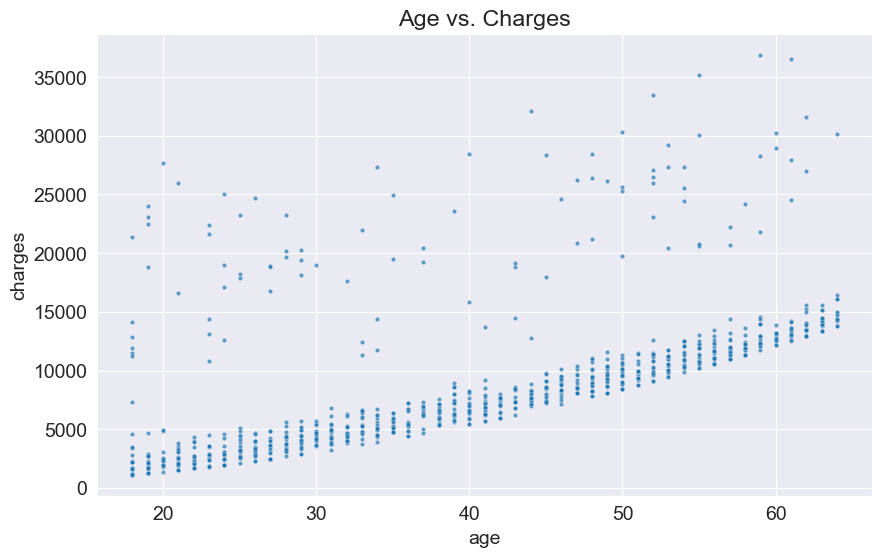

In [ ]:
## Linear Regression with a Single Feature
# Smoker and Age colums have the strongest correlation with Charges.
# Find a way to extemate the value of Charges using the value of Age for non-smokers.
# Let's create a data frame containing just the data for non-smokers.

non_smoker_df = medical_df[medical_df.smoker == "no"]

plt.title('Age vs. Charges')
fig = sns.scatterplot(data=non_smoker_df,
                x='age',
                y='charges',
                alpha=0.7,
                s=10)
fig.update_layout(xaxis_title_font_textcase="upper",
                   yaxis_title_font_textcase="upper")